In [8]:
import cv2
import matplotlib.pyplot as plt
from Code.Fonctions_Traitement import FPS
import numpy as np

In [11]:
input_path = r"../Videos/J12 USAMvsMHB.mp4"
output_path_video15 = r"../../Videos/CANNESLONG/LONG15.mp4"

In [10]:
#Permet de convertir la vidéo que l'on souhaite en 15 FPS

FPS.convert_video_to_fps(input_path, output_path_video15, 5)

{'video_found': False, 'audio_found': False, 'metadata': {}, 'inputs': [{'streams': [None]}], 'video_n_frames': 0, 'video_duration': 0.0}
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i ../Videos/J12 USAMvsMHB.mp4 -loglevel error -f image2pipe -vf scale=1:1 -sws_flags bicubic -pix_fmt rgb24 -vcodec rawvideo -


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/moviepy/video/io/ffmpeg_reader.py:178: UserWarning: In file ../Videos/J12 USAMvsMHB.mp4, 3 bytes wanted but 0 bytes read at frame index 0 (out of a total 0 frames), at time 0.00/0.00 sec. Using the last valid frame instead.
  warnings.warn(


OSError: MoviePy error: failed to read the first frame of video file ../Videos/J12 USAMvsMHB.mp4. That might mean that the file is corrupted. That may also mean that you are using a deprecated version of FFMPEG. On Ubuntu/Debian for instance the version in the repos is deprecated. Please update to a recent version from the website.

In [12]:
#Calcul l'histogramme uniquement pour le bleu et les 30 premiers niveaux d'intensité de pixel
cap = cv2.VideoCapture(output_path_video15)

# Vérifier si la vidéo est bien chargée
if not cap.isOpened():
    print("Erreur lors du chargement de la vidéo")
    exit()

sum_blue = []
frame_count = 0


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Fin de la vidéo
    # On calcule uniquement l'histogramme du canal bleu (canal 0 en BGR)
    sum_blue.append(np.sum(frame[:, :, 0][frame[:, :, 0] < 30]))


    frame_count += 1

cap.release()
print(sum_blue)

[np.uint64(5175147), np.uint64(5245493), np.uint64(5291579), np.uint64(4868527), np.uint64(4875747), np.uint64(4923346), np.uint64(4935580), np.uint64(4944790), np.uint64(4940807), np.uint64(4959390), np.uint64(4968326), np.uint64(4986064), np.uint64(5262103), np.uint64(5274507), np.uint64(5272234), np.uint64(5268122), np.uint64(5232155), np.uint64(5257999), np.uint64(5248019), np.uint64(5262729), np.uint64(5257722), np.uint64(5201298), np.uint64(5198377), np.uint64(5204740), np.uint64(5205865), np.uint64(5204678), np.uint64(5198418), np.uint64(5205340), np.uint64(5187950), np.uint64(5196340), np.uint64(5192367), np.uint64(5199027), np.uint64(5185394), np.uint64(5204134), np.uint64(5202190), np.uint64(5204810), np.uint64(5160562), np.uint64(5207293), np.uint64(5170844), np.uint64(5252536), np.uint64(5246694), np.uint64(5185477), np.uint64(5132624), np.uint64(5048665), np.uint64(5000245), np.uint64(5010760), np.uint64(5043731), np.uint64(5058437), np.uint64(4870203), np.uint64(4891243),

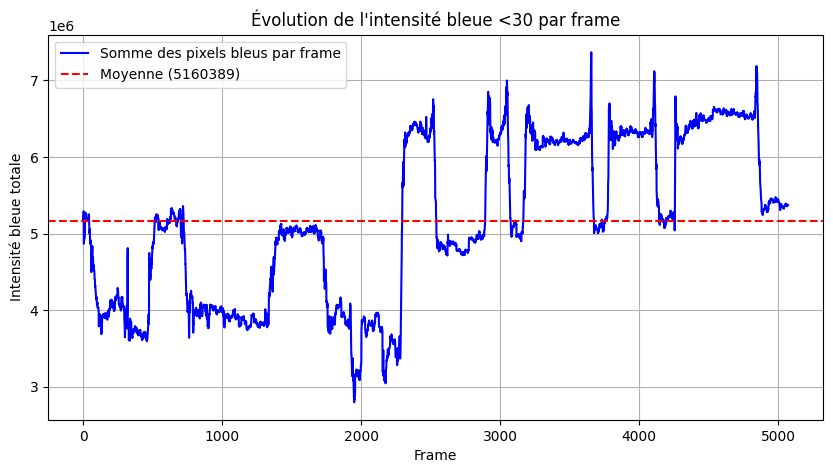

In [13]:
# Exemple de tableau : intensité bleue par frame

# Calcul de la moyenne
mean_val = np.mean(sum_blue)

# Création du graphe
plt.figure(figsize=(10, 5))
plt.plot(sum_blue, label='Somme des pixels bleus par frame', color='blue')
plt.axhline(y=mean_val, color='red', linestyle='--', label=f'Moyenne ({mean_val:.0f})')

# Ajouts esthétiques
plt.xlabel('Frame')
plt.ylabel('Intensité bleue totale')
plt.title('Évolution de l\'intensité bleue <30 par frame')
plt.legend()
plt.grid(True)

# Affichage
plt.show()